<a href="https://colab.research.google.com/github/TinizaraRodriguez/_paddleOCR/blob/main/_paddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install paddlepaddle paddleocr
!pip install opencv-python

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [36]:
result = ocr.ocr('/content/matriculas_varias.jpeg')
print(result)

[2023/10/07 18:02:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2023/10/07 18:02:37] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.04651951789855957
[2023/10/07 18:02:37] ppocr DEBUG: rec_res num  : 2, elapsed : 0.015709877014160156
[[[[[1323.0, 643.0], [1437.0, 643.0], [1437.0, 680.0], [1323.0, 680.0]], ('7.GC-1-1108', 0.8445568680763245)], [[[102.0, 1336.0], [297.0, 1354.0], [293.0, 1402.0], [97.0, 1383.0]], ('CARMITA', 0.9632083773612976)]]]


(array([[[ 102., 1336.],
        [ 297., 1354.],
        [ 293., 1402.],
        [  97., 1383.]],

       [[1323.,  643.],
        [1437.,  643.],
        [1437.,  680.],
        [1323.,  680.]]], dtype=float32), 0.04421377182006836)


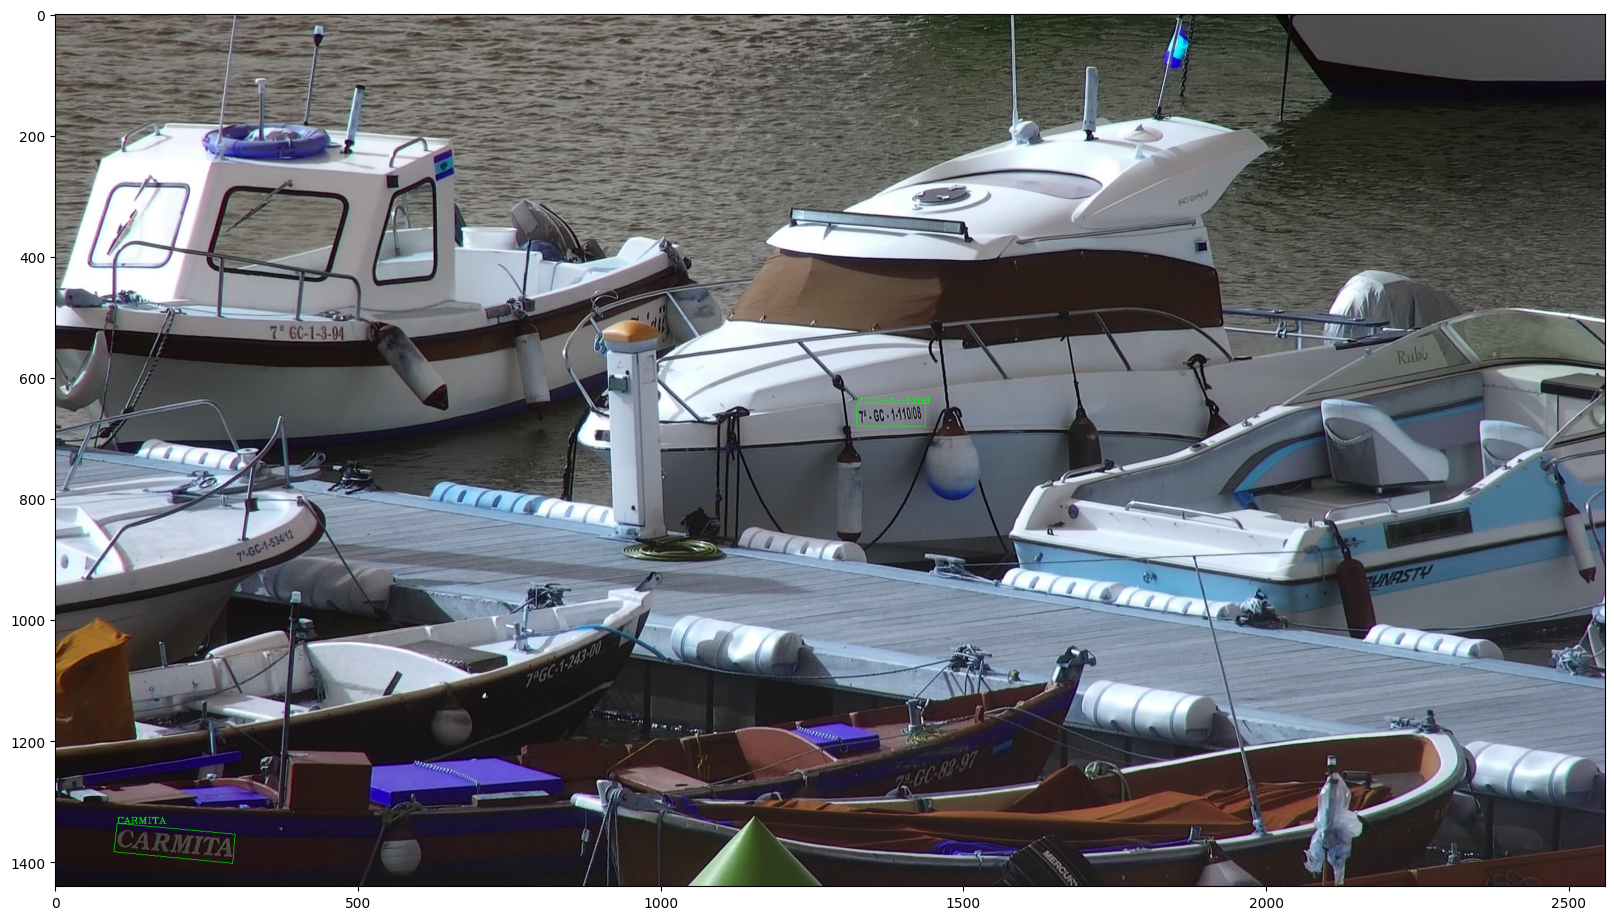

In [37]:
from paddleocr import PaddleOCR,draw_ocr

# read image using opencv python
image = cv2.imread('/content/matriculas_varias.jpeg')
imagen = ocr.text_detector(image)
print (imagen)

for row in result[0]:
    bbox = [[int(r[0]), int(r[1])] for r in row[0]]

    # write text output on image at each line
    cv2.putText(image, row[1][0], bbox[0], cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0, 255, 0), 1)
    cv2.polylines(image, [np.array(bbox)], True, (0, 255, 0), 1)

# save image
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.show()

[2023/10/07 18:05:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

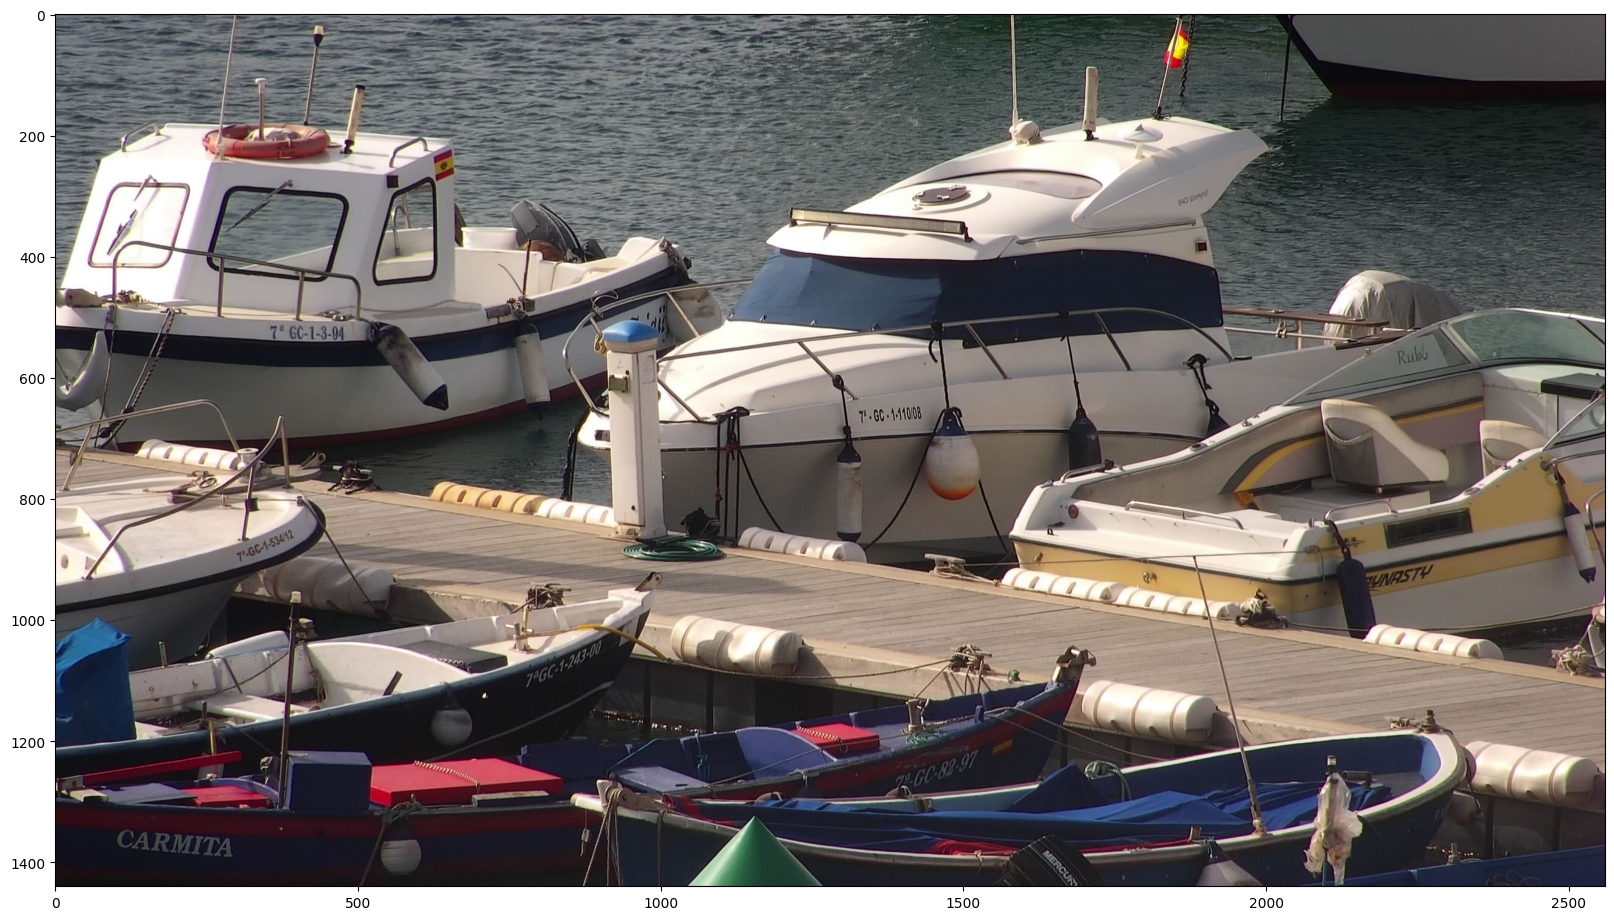

In [42]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `french`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory
img_path = '/content/matriculas_varias.jpeg'
result = ocr.ocr(img_path, cls=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
bbox = [[int(r[0]), int(r[1])] for r in row[0]]

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.show()


[2023/10/07 18:07:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

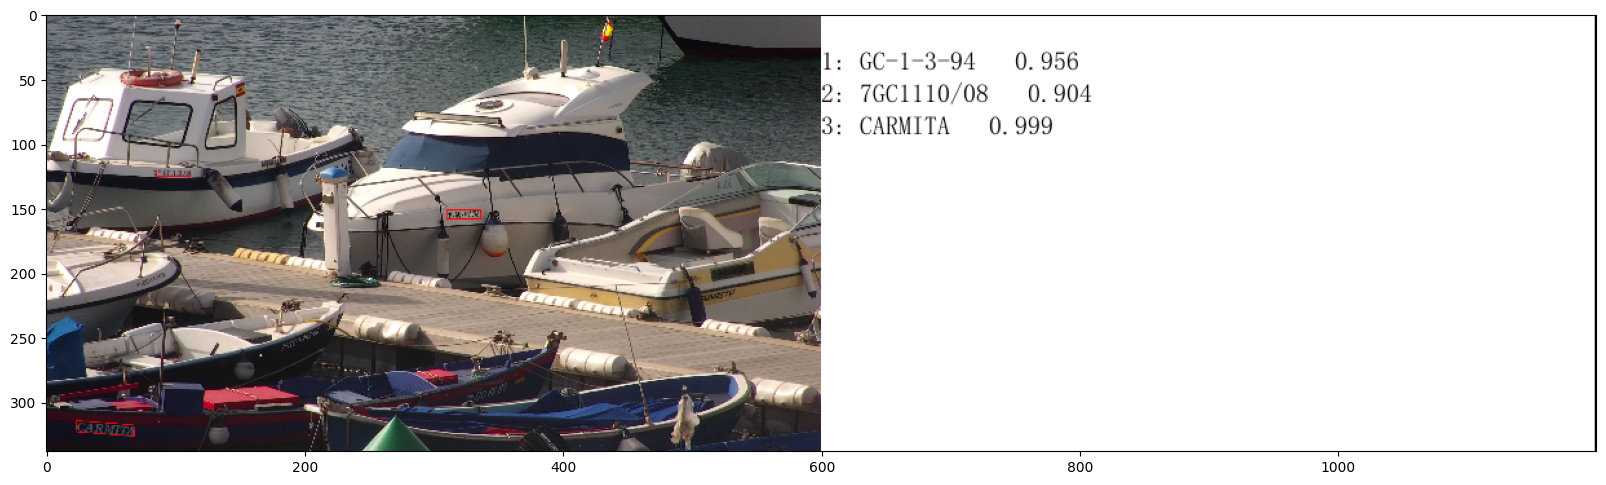

In [45]:
from paddleocr import PaddleOCR,draw_ocr
ocr = PaddleOCR(lang='en')
img_path = '/content/matriculas_varias.jpeg'
result = ocr.ocr(img_path, cls=False)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/PaddleOCR/doc/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)


plt.figure(figsize=(20,20))
plt.imshow(im_show)
plt.show()